## WebScraping - Pagina 12

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://www.pagina12.com.ar/"
p12 = requests.get(url)
p12.status_code

200

In [3]:
# p12.text

In [4]:
# p12.content

In [5]:
# p12.headers

In [6]:
p12.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [7]:
p12.request.method

'GET'

In [8]:
p12.request.url

'https://www.pagina12.com.ar/'

In [9]:
soup = BeautifulSoup(p12.text, "lxml")

In [10]:
type(soup)

bs4.BeautifulSoup

In [11]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar" name="og:url" property="og:url"/>
  <meta 

In [12]:
secciones = soup.find("ul", attrs={"class":"hot-sections"}).find_all("li")
secciones

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/ciencia">Ciencia</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]

In [13]:
seccion = secciones[0]
seccion

<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

In [14]:
seccion.a.get("href")

'https://www.pagina12.com.ar/secciones/el-pais'

In [15]:
seccion.a.get_text()

'El país'

In [16]:
links_secciones = [seccion.a.get("href") for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/ciencia',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [17]:
sec = requests.get(links_secciones[0])
sec

<Response [200]>

In [18]:
soup_seccion = BeautifulSoup(sec.text, "lxml")
print(soup_seccion.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="El país | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" prope

In [19]:
featured_article = soup_seccion.find("div", attrs={"class": "featured-article__container"})
featured_article

<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/278744-coronavirus-la-camara-de-diputados-evalua-la-deforestacion-e">Reunión de la comisión de Recursos Naturales y Conservación del Ambiente Humano</a></span><h2><a href="https://www.pagina12.com.ar/278744-coronavirus-la-camara-de-diputados-evalua-la-deforestacion-e">Coronavirus: La Cámara de Diputados evalúa la deforestación en la nueva normalidad</a></h2><a href="https://www.pagina12.com.ar/278744-coronavirus-la-camara-de-diputados-evalua-la-deforestacion-e"><p class="subhead"></p></a><div class="data-bar"><span class="date-1">15 de julio de 2020</span></div></div>

In [20]:
featured_article.a.get("href")

'https://www.pagina12.com.ar/278744-coronavirus-la-camara-de-diputados-evalua-la-deforestacion-e'

In [21]:
article_list = soup_seccion.find("ul", attrs={"class": "article-list"})
article_list

<ul class="article-list"><li></li><li><div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="100"><div class="first-col column small-8 xsmall-8"><div class="article-box__container"><h2><a href="https://www.pagina12.com.ar/278739-lxs-chicxs-del-pueblo-o-la-epopeya-de-la-ternura">Lxs Chicxs del pueblo o la epopeya de la ternura </a></h2><div class="data-bar"><span class="date-1">15 de julio de 2020</span><i>|</i><span class="tag-1">Por <a class="no-link">Claudia Bernazza *</a></span></div></div></div><div class="second-col column small-4 xsmall-4 no-pad-left-sm"><div class="article-box__image-container"><a class="relative object-fit intrinsic-container intrinsic-container-16x9" href="https://www.pagina12.com.ar/278739-lxs-chicxs-del-pueblo-o-la-epopeya-de-la-ternura"><img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_16_9_300x169/public/2020-07/dsc

In [22]:
def lista_de_noticias(soup):
    
    final_list = []
    # pre
    # promocionada
    featured_article = soup.find("div", attrs={"class": "featured-article__container"})
    featured_article = featured_article.a.get("href")
    final_list.append(featured_article)
    # lista
    article_list = soup.find("ul", attrs={"class": "article-list"}).find_all("h2")
    article_list = [article.a.get("href") for article in article_list]
    
    return final_list + article_list

urls_notas = lista_de_noticias(soup_seccion)
urls_notas

['https://www.pagina12.com.ar/278744-coronavirus-la-camara-de-diputados-evalua-la-deforestacion-e',
 'https://www.pagina12.com.ar/278739-lxs-chicxs-del-pueblo-o-la-epopeya-de-la-ternura',
 'https://www.pagina12.com.ar/278698-santiago-cafiero-recibio-1-651-preguntas-de-diputados',
 'https://www.pagina12.com.ar/278694-coronavirus-que-hacer-si-una-persona-muere-en-la-casa-o-en-l',
 'https://www.pagina12.com.ar/278682-imaginario-alberto-alfonsin-cristina',
 'https://www.pagina12.com.ar/278649-mario-wainfeld-el-gobierno-ha-sido-mas-solido-en-lograr-cons',
 'https://www.pagina12.com.ar/278644-nicolas-trotta-seria-irracional-plantear-un-aumento-en-las-e',
 'https://www.pagina12.com.ar/278642-coronavirus-fernando-gray-inauguro-el-primer-laboratorio-de-',
 'https://www.pagina12.com.ar/278637-alberto-fernandez-presento-el-programa-de-inversion-en-infra',
 'https://www.pagina12.com.ar/278634-coronavirus-luis-delia-dio-positivo',
 'https://www.pagina12.com.ar/278631-nueva-cuarentena-la-ciudad-insi

In [23]:
r = requests.get(url)
r

<Response [200]>

In [24]:
url_mala = url.replace("2","3")
url_mala

'https://www.pagina13.com.ar/'

In [25]:
#requests.get(url_mala)

In [26]:
try:
    requests.get(url_mala)
except Exception as e:
    print("Error")
    print(e)

Error
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7f2c0b7610>: Failed to establish a new connection: [Errno -2] Name or service not known'))


In [33]:
url_nota = urls_notas[1]
url_nota

'https://www.pagina12.com.ar/278739-lxs-chicxs-del-pueblo-o-la-epopeya-de-la-ternura'

In [34]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        soup_nota = BeautifulSoup(nota.text,"lxml")
        # titulo
        titulo = soup_nota.find("div", attrs={"class": "article-title"})
        print(titulo.text)
        # Fecha
        fecha = soup_nota.find("span", attrs={"pubdate": "pubdate"}).get("datetime")
        print(fecha)
        # Volanta
        volanta = soup_nota.find("h2", attrs={"class": "article-prefix"})
        print(volanta.get_text())     
        # Body 
        cuerpo = soup_nota.find("div", attrs={"class": "article-text"}).find_all("p")
        print(cuerpo)
except Exception as e:
    print("Error")
    print(e)
    print("\n")

Fernán Quirós: "Por cada caso positivo detectado hubo nueve no descubiertos"El ministro de Salud de CABA presentó un estudio sobre la Villa 31
2020-07-15
Error
'NoneType' object has no attribute 'get_text'




In [36]:
media = soup_nota.find("div", attrs={"class": "article-main-media-image"})
imagenes = media.find_all("img")
imagenes

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-07/dsc-1113.JPG?itok=K4J0BJ29" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-07/dsc-1113.JPG?itok=GgaajvCA" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-07/dsc-1113.JPG?itok=GgaajvCA" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-07/dsc-1113.JPG?itok=GgaajvCA" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-xlarge" data-src="https://images.pagina12.com.ar/styles/focal_3_2_9

In [39]:
if len(imagenes) == 0:
    print("No se encontraron imagenes")
else:
    imagen = imagenes[-1]
    img_src = imagen.get("data-src")
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-07/dsc-1113.JPG?itok=GgaajvCA


In [40]:
img_req = requests.get(img_src)
img_req.status_code

200

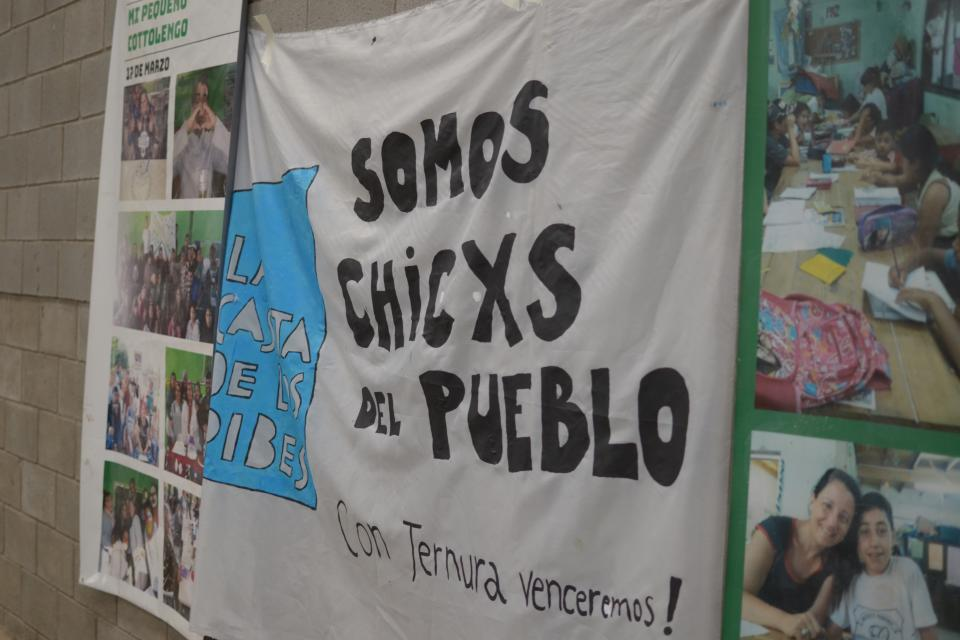

In [41]:
from IPython.display import Image
Image(img_req.content)

In [68]:
def obtener_info(soup_nota):
    # Creamos un diccionario vacio para poblarlo con la info
    ret_dict = {}
    
    # Extraemos la fecha
    fecha = soup_nota.find("span", attrs={"pubdate":"pubdate"})
    if fecha:
        ret_dict["fecha"] = fecha.get("datetime")
    else:
        ret_dict["fecha"] = None
    
    # Extraemos el titulo
    titulo = soup_nota.find("div",attrs={"class": "article-title"})
    if titulo:
        ret_dict["titulo"] = titulo.text
    else:
        ret_dict["titulo"] = None

    # Extraemos el volanta
    volanta = soup_nota.find("div",attrs={"class": "article-prefix"})
    if volanta:
        ret_dict["volanta"] = volanta.get_text()
    else:
        ret_dict["volanta"] = None
        
    # Extraemos el copete
    copete = soup_nota.find("div", attrs={"class": "article-summary"})
    if copete:
        ret_dict["copete"] = copete.get_text()
    else:
        ret_dict["copete"] = None

    autor = soup_nota.find("div",attrs={"class": "article-author"})
    if titulo:
        ret_dict["autor"] = autor.a.get_text()
    else:
        ret_dict["autor"] = None
        
    media = soup_nota.find("div", attrs={"class": "article-main-media-image"})
    if media:
        imagenes = media.find_all("img")
        if len(imagenes) == 0:
            print("No se encontraron imagenes")
        else:
            imagen = imagenes[-1]
            img_src = imagen.get("data-src")
            try:
                img_req = requests.get(img_src)
                if img_req.status_code == 200:
                    ret_dict["imagen"] = img_req.content
                else:    
                    ret_dict["imagen"] = None
            except:
                print("No se pudo obtener la imagen")
    else:
        print("No se encontro media")
        
    # Extraemos el cuerpo de la nota
    cuerpo = soup_nota.find("div", attrs={"class": "article-text"})
    if cuerpo:
        ret_dict["cuerpo"] = cuerpo.get_text()
    else:    
        ret_dict["cuerpo"] = None        
        
    return ret_dict


In [69]:
# obtener_info(soup_nota)

In [70]:
def scrape_nota(url):
    try:
        nota = requests.get(url)
    except Exception as e:
        print("Error scrapeando URL ", url)
        print(e)
        return None
    
    if nota.status_code != 200:
        print(f"Error obteniendo nota {url}")
        print(f"Status Code = {nota.status_code}")
        return None
    
    soup_nota = BeautifulSoup(nota.text, "lxml")
    
    ret_dict = obtener_info(soup_nota)
    ret_dict["url"] = url
    
    return ret_dict
    

scrape_nota(url_nota)
    

{'fecha': '2020-07-15',
 'titulo': 'Senado: un aval para la donación voluntaria de plasmaEl proyecto fue aprobado por unanimidad en comisión',
 'volanta': None,
 'copete': None,
 'autor': 'Claudia Bernazza *',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc2\x00\x11\x08\x02\x80\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1a\x00\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x00\x03\x04\x05\x06\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xe7\xa9^z\xb0\xa9\x15^\xb1\xe2\xb8\x86\xd7$ \x95\xd9Y\xbbn]z\x80\xe0\

In [71]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/ciencia',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [72]:
notas = []
for link in links_secciones:
    try:
        r = requests.get(link)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, "lxml")
            notas.extend(lista_de_noticias(soup))
        else:
            print("No se pudo obtener la seccion ", link)
    except:
        print("No se pudo obtener la seccion", link)
notas

No se pudo obtener la seccion https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos


['https://www.pagina12.com.ar/278836-senado-un-aval-para-la-donacion-voluntaria-de-plasma',
 'https://www.pagina12.com.ar/278835-ataque-a-los-qom-nueva-cupula-policial-en-chaco',
 'https://www.pagina12.com.ar/278833-luego-de-faltar-al-encuentro-con-alberto-fernandez-reclamaro',
 'https://www.pagina12.com.ar/278829-peajes-indagan-a-dos-hombres-de-macri',
 'https://www.pagina12.com.ar/278825-una-ayudita-a-las-arcas-provinciales',
 'https://www.pagina12.com.ar/278824-macri-pidio-que-no-investiguen-sus-celulares',
 'https://www.pagina12.com.ar/278822-que-todo-lo-resuelva-la-negociacion-politica',
 'https://www.pagina12.com.ar/278818-atentado-a-la-amia-los-actos-y-las-polemicas-en-un-nuevo-ani',
 'https://www.pagina12.com.ar/278814-pietragalla-todos-necesitamos-saber-que-paso-con-facundo',
 'https://www.pagina12.com.ar/278813-terminaron-las-primeras-obras-para-llevar-agua-a-los-wichis-',
 'https://www.pagina12.com.ar/278782-el-presidente-define-con-larreta-y-kicillof-como-sigue-la-cu',
 'ht

In [73]:
data = []
for i , nota in enumerate(notas):
    print(f"Scrapeando nota{i}/{len(notas)}")
    data.append(scrape_nota(nota))

Scrapeando nota0/102
Scrapeando nota1/102
Scrapeando nota2/102
Scrapeando nota3/102
Scrapeando nota4/102
Scrapeando nota5/102
Scrapeando nota6/102
Scrapeando nota7/102
Scrapeando nota8/102
Scrapeando nota9/102
Scrapeando nota10/102
Scrapeando nota11/102
No se encontro media
Scrapeando nota12/102
Scrapeando nota13/102
Scrapeando nota14/102
Scrapeando nota15/102
Scrapeando nota16/102
Scrapeando nota17/102
Scrapeando nota18/102
Scrapeando nota19/102
Scrapeando nota20/102
Scrapeando nota21/102
Scrapeando nota22/102
Scrapeando nota23/102
Scrapeando nota24/102
Scrapeando nota25/102
Scrapeando nota26/102
Scrapeando nota27/102
Scrapeando nota28/102
Scrapeando nota29/102
Scrapeando nota30/102
Scrapeando nota31/102
Scrapeando nota32/102
Scrapeando nota33/102
Scrapeando nota34/102
Scrapeando nota35/102
Scrapeando nota36/102
Scrapeando nota37/102
Scrapeando nota38/102
Scrapeando nota39/102
Scrapeando nota40/102
Scrapeando nota41/102
Scrapeando nota42/102
Scrapeando nota43/102
Scrapeando nota44/102

In [74]:
import pandas as pd

In [75]:
df = pd.DataFrame(data)
df

,fecha,titulo,volanta,copete,autor,imagen,cuerpo,url
0,2020-07-15,Senado: un aval para la donación voluntaria de...,None,None,Patricia Chaina,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,La comisión de Salud del Senado avaló por unan...,https://www.pagina12.com.ar/278836-senado-un-a...
1,2020-07-15,Senado: un aval para la donación voluntaria de...,None,None,Patricia Chaina,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"“Dentro de la ley todo, fuera de la ley nada, ...",https://www.pagina12.com.ar/278835-ataque-a-lo...
2,2020-07-15,Senado: un aval para la donación voluntaria de...,None,None,Werner Pertot,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Luego de faltar al encuentro con el presidente...,https://www.pagina12.com.ar/278833-luego-de-fa...
3,2020-07-15,Senado: un aval para la donación voluntaria de...,None,El ex director de Vialidad Nacional Javier Igu...,Sofía Caram,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"Tras un año de investigación, finalmente dos e...",https://www.pagina12.com.ar/278829-peajes-inda...
4,2020-07-15,Senado: un aval para la donación voluntaria de...,None,"Los gobernadores de Jujuy, La Rioja, Salta y T...",Patricia Chaina,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,El gobierno nacional continuará reforzando las...,https://www.pagina12.com.ar/278825-una-ayudita...
...,...,...,...,...,...,...,...,...
97,2020-07-05,Senado: un aval para la donación voluntaria de...,None,None,José Pablo Feinmann,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,En algunos programas de claro corte kirchneris...,https://www.pagina12.com.ar/276563-horas-dific...
98,2020-07-04,Senado: un aval para la donación voluntaria de...,None,None,Sandra Russo,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,El hombre retacón y fornido portaba un fusil d...,https://www.pagina12.com.ar/276360-desquicio-l...
99,2020-07-03,Senado: un aval para la donación voluntaria de...,None,None,Mario Goloboff,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"Francisco Madariaga, nacido en septiembre de 1...",https://www.pagina12.com.ar/276139-otra-mirada...
100,2020-07-02,Senado: un aval para la donación voluntaria de...,None,None,Jorge Majfud,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"“Si eres rubio, perteneces a la mejor gente de...",https://www.pagina12.com.ar/275940-los-ideolog...


In [76]:
df.to_csv("Nota Pagina12.csv")